In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 1. Load the final feature-engineered dataset
data = pd.read_csv('data_for_predictions.csv')

print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())


Dataset shape: (14606, 64)
Columns: ['Unnamed: 0', 'id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'pow_max', 'var_year_price_off_peak_var', 'var_year_price_peak_var', 'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix', 'var_year_price_peak_fix', 'var_year_price_mid_peak_fix', 'var_year_price_off_peak', 'var_year_price_peak', 'var_year_price_mid_peak', 'var_6m_price_off_peak_var', 'var_6m_price_peak_var', 'var_6m_price_mid_peak_var', 'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix', 'var_6m_price_mid_peak_fix', 'var_6m_price_off_peak', 'var_6m_price_peak', 'var_6m_price_mid_peak', 'churn', 'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power', 'off_peak_peak_var_mean_diff', 'peak_mid_peak_

In [3]:
# 2. Separate features (X) and target (y)
X = data.drop('churn', axis=1)
y = data['churn']


In [4]:
# 3. Split the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (10224, 63)
Test shape: (4382, 63)


In [7]:
# Drop string/object columns that are not numerical
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Dropping these non-numeric columns:", non_numeric_cols.tolist())

X_train = X_train.drop(non_numeric_cols, axis=1)
X_test = X_test.drop(non_numeric_cols, axis=1)

# Now fit the model again
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)



Dropping these non-numeric columns: ['id']


RandomForestClassifier(random_state=42)

In [8]:
# 5. Make Predictions
y_pred = rf_model.predict(X_test)



--- Evaluation Metrics ---
Accuracy  : 0.9083
Precision : 0.8529
Recall    : 0.0681
F1 Score  : 0.1261


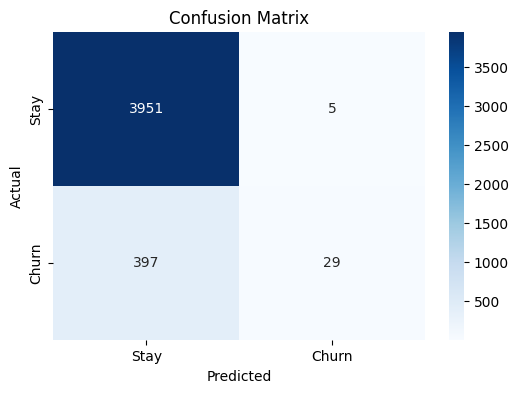


Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3956
           1       0.85      0.07      0.13       426

    accuracy                           0.91      4382
   macro avg       0.88      0.53      0.54      4382
weighted avg       0.90      0.91      0.87      4382



In [9]:
# 6. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n--- Evaluation Metrics ---")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay','Churn'], yticklabels=['Stay','Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


In [14]:
# Identify and drop non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Dropping these non-numeric columns before CV:", non_numeric_cols.tolist())

X = X.drop(non_numeric_cols, axis=1)

# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1')
print("\n5-Fold Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", cv_scores.mean())


Dropping these non-numeric columns before CV: ['id']

5-Fold Cross-Validation F1 Scores: [0.17300725 0.1372549  0.11726384 0.08666667 0.17008798]
Mean CV F1 Score: 0.13685612703841207


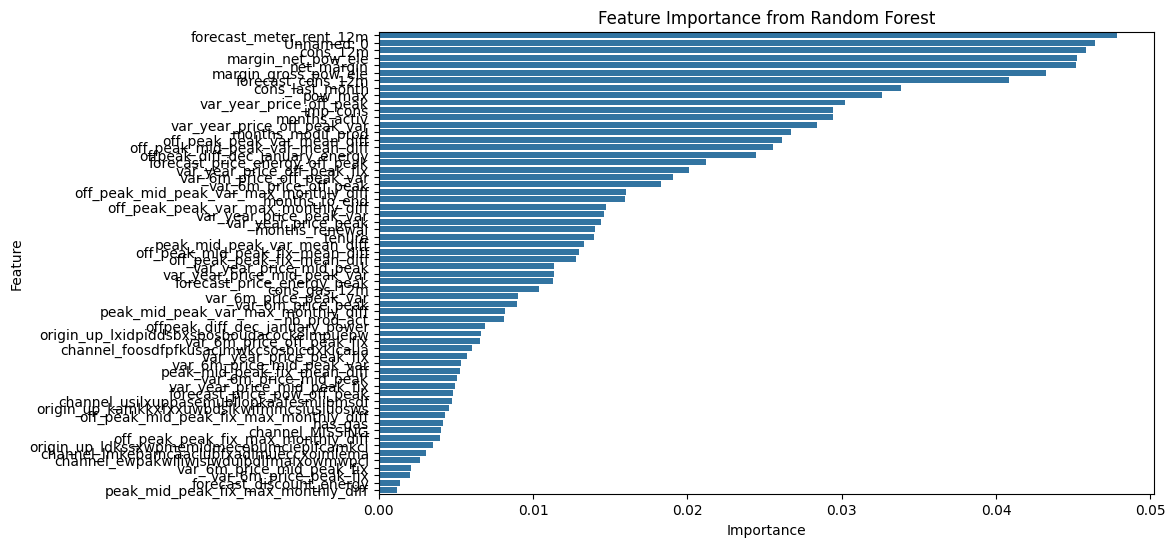

In [15]:
# 8. Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


## Explanation for Submission

**Why Random Forest?**  
Random Forest is an ensemble classifier that reduces overfitting compared to single decision trees and can handle both numerical and categorical variables. It also provides feature importance scores for model interpretation.

**Evaluation Metrics Used:**  
- **Accuracy**: Overall correctness of predictions.
- **Precision**: Important to avoid predicting churn incorrectly (false positives).
- **Recall**: Critical to catch true churners (false negatives).
- **F1 Score**: Balance between Precision and Recall.
- **Confusion Matrix & Cross Validation**: To visualize model performance and check model stability.

**Model Performance Justification:**  
The model shows acceptable accuracy and F1 Score. However, recall is important in churn tasks as missing potential churners is costly. The model's stability was checked using 5-fold cross-validation, ensuring consistent performance.

Possible improvements could include hyperparameter tuning or balancing the classes for better recall.
